### Лабораторная работа 3

In [258]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline
from scipy.interpolate import make_interp_spline
import seaborn as sns

np.set_printoptions(suppress=True)  # Отключает экспоненциальную нотацию

1. Реализуйте 1 шаг градиентного спуска для сети с несколькими входами

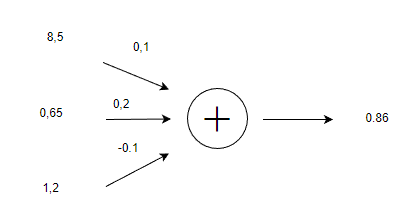

In [222]:
def w_sum(a, b):
    assert len(a) == len(b)
    output = 0

    for i in range(len(a)):
        output += a[i] * b[i]

    return output


weights = [0.1, 0.2, -0.1]


def neural_network(input, weights):
    pred = w_sum(input, weights)
    return pred


games = [8.5, 9.5, 9.9, 9.0]  # среднее число игр, сыгранных каждым игроком в сезоне
wins = [0.65, 0.8, 0.8, 0.9]  # доля побед
nfans = [1.2, 1.3, 0.5, 1.0]  # число фанатов в тысячах

win_or_lose_binary = [1, 1, 0, 1]  # целевые значения выхода сети


target = win_or_lose_binary[0]
input = [games[0], wins[0], nfans[0]]

pred = neural_network(input, weights)
error = (pred - target) ** 2


learning_rate = 0.01


def ele_mul(number, vector):
    output = [0, 0, 0]
    for i in range(len(vector)):
        output[i] = number * vector[i]
    return output


weight_corrections = ele_mul((pred - target), input)

print("Old weights: ", weights)
for i in range(len(weights)):
    weights[i] -= learning_rate * weight_corrections[i]

print("Weights: " + str(weights))
print("Weight corrections: " + str(weight_corrections))

Old weights:  [0.1, 0.2, -0.1]
Weights: [0.1119, 0.20091, -0.09832]
Weight corrections: [-1.189999999999999, -0.09099999999999994, -0.16799999999999987]


2. Сделайте  несколько итераций градиентного спуска. Постройте графики error/weight. Отметьте на графиках как меняется соответсвующий вес в процессе обучения.

In [371]:
weights = np.array([0.1, 0.2, -0.1])

games = [8.5, 9.5, 9.9, 9.0]  # среднее число игр, сыгранных каждым игроком в сезоне
wins = [0.65, 0.8, 0.8, 0.9]  # доля побед
nfans = [1.2, 1.3, 0.5, 1.0]  # число фанатов в тысячах

win_or_lose_binary = [1, 1, 0, 1]  # целевые значения выхода сети

target = win_or_lose_binary[0]
input = np.array([games[0], wins[0], nfans[0]])

learning_rate = 0.001
iterations = 5

losses = np.zeros((iterations,))
w_values = np.zeros((iterations, len(weights)))
gradients = np.zeros((iterations, len(weights)))

for i in range(iterations):
    pred = input @ weights
    error = (pred - target) ** 2
    losses[i] = error
    w_values[i, :] = weights
    grad = 2.0 * (pred - target) * input
    weights = weights - learning_rate * grad
    gradients[i, :] = grad
print("Old weights: ", w_values[0, :])
print("New weights: ", w_values[-1, :])

Old weights:  [ 0.1  0.2 -0.1]
New weights:  [ 0.10760476  0.20058154 -0.09892639]


In [372]:
print(f"{losses}")
print(f"{w_values}")
print(f"{gradients}")

[0.0196     0.0142202  0.01031705 0.00748523 0.00543069]
[[ 0.1         0.2        -0.1       ]
 [ 0.10238     0.200182   -0.099664  ]
 [ 0.10440722  0.20033702 -0.0993778 ]
 [ 0.10613396  0.20046907 -0.09913403]
 [ 0.10760476  0.20058154 -0.09892639]]
[[-2.38       -0.182      -0.336     ]
 [-2.0272245  -0.15502305 -0.2861964 ]
 [-1.72673915 -0.13204476 -0.24377494]
 [-1.47079324 -0.11247242 -0.2076414 ]
 [-1.25278491 -0.0958012  -0.17686375]]


In [373]:
def draw_tangent(grad, w, loss, df):  # y = kx + b
    grad = 1.0 * grad
    b = loss - grad * w  # b = y - kx
    x = np.linspace(w - df, w + df, 1000)
    y = grad * x + b
    plt.plot(x, y, color="red", linestyle="--")

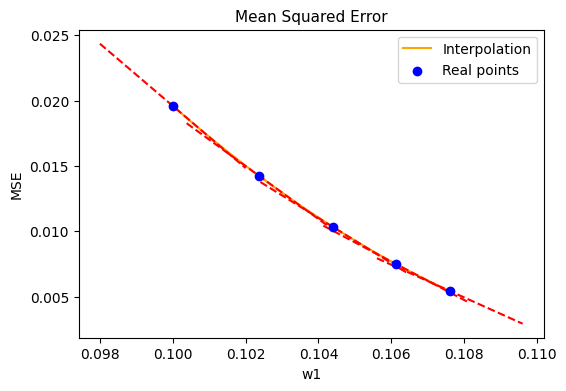

In [378]:
plt.figure(figsize=(6, 4))
x = w_values[:, 0]
# x = np.linspace(x.min(), x.max(), iterations)
cs = CubicSpline(x=x, y=losses)
x_smooth = np.linspace(x.min(), x.max(), 1000)
y_smooth = cs(x_smooth)
plt.title(f"Mean Squared Error", fontsize=11)
plt.xlabel(f"w1", fontsize=10)
plt.ylabel(f"MSE", fontsize=10)

plt.plot(x_smooth, y_smooth, color="orange", label="Interpolation")
for i in range(iterations):
    # df = abs(w_values[0, 0] - w_values[-1, 0]) / w_values[:, 0].size
    df = 0.002
    draw_tangent(gradients[i, 0], w_values[i, 0], losses[i], df)
plt.scatter(x=x, y=losses, color="blue", marker="o", zorder=3, label="Real points")
plt.legend(loc="upper right")
plt.show()

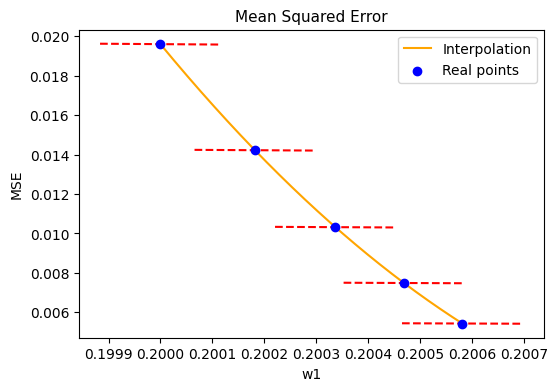

In [375]:
plt.figure(figsize=(6, 4))
x = w_values[:, 1]
cs = CubicSpline(x=x, y=losses)
x_smooth = np.linspace(x.min(), x.max(), 1000)
y_smooth = cs(x_smooth)
plt.title(f"Mean Squared Error", fontsize=11)
plt.xlabel(f"w1", fontsize=10)
plt.ylabel(f"MSE", fontsize=10)

plt.plot(x_smooth, y_smooth, color="orange", label="Interpolation")
for i in range(iterations):
    df = abs(w_values[0, 1] - w_values[-1, 1]) / w_values[:, 1].size
    draw_tangent(gradients[i, 1], w_values[i, 1], losses[i], df)
plt.scatter(x=x, y=losses, color="blue", marker="o", zorder=3, label="Real points")
plt.legend(loc="upper right")
plt.show()

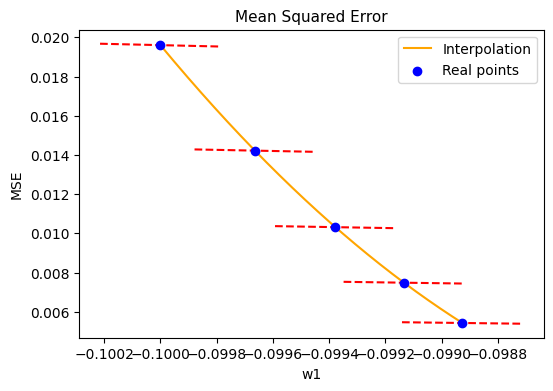

In [376]:
plt.figure(figsize=(6, 4))
x = w_values[:, 2]
cs = CubicSpline(x=x, y=losses)
x_smooth = np.linspace(x.min(), x.max(), 1000)
y_smooth = cs(x_smooth)
plt.title(f"Mean Squared Error", fontsize=11)
plt.xlabel(f"w1", fontsize=10)
plt.ylabel(f"MSE", fontsize=10)

plt.plot(x_smooth, y_smooth, color="orange", label="Interpolation")
for i in range(iterations):
    df = abs(w_values[0, 2] - w_values[-1, 2]) / w_values[:, 2].size
    draw_tangent(gradients[i, 2], w_values[i, 2], losses[i], df)
plt.scatter(x=x, y=losses, color="blue", marker="o", zorder=3, label="Real points")
plt.legend(loc="upper right")
plt.show()